In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 12:10:33.599547: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 12:10:33.937786: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 12:10:34.597081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_ind', 'Cam_branco_ind', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_sete_barbas_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']
  
dados = dados[['Ano','Cam_sete_barbas_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_sete_barbas_ind'] = dados.loc[i,'Cam_sete_barbas_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_sete_barbas_ind'].values
dados.head()

/tmp/ipykernel_5625/1278497193.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']


,Ano,Cam_sete_barbas_ind,Soma,Prop_Cam_sete_barbas_ind
0,1982,111.0,289.0,0.384083
1,1983,177.0,501.0,0.353293
2,1984,373.0,618.0,0.603560
3,1996,7.0,210.0,0.033333
4,1998,14.0,235.5,0.059448


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [18]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=200, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/pesos prop ind 1962-2009/.weights.h5', overwrite=True)

Epoch 1/200


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - loss: 0.9871
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9543
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9297
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9051
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8757
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8442
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8090
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7703
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7290
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6854
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6408
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5960
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5547
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5178
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4855
Epoch 16/200
1/1 ━━━━━━━━━━━━━

In [19]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/pesos prop ind 1962-2009/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.50510395]
 [0.50080776]
 [0.4965117 ]
 [0.4923069 ]
 [0.4880498 ]
 [0.4839617 ]
 [0.48012263]
 [0.4762842 ]
 [0.47244567]
 [0.4686716 ]
 [0.4649991 ]
 [0.4613307 ]
 [0.45777762]
 [0.45432884]
 [0.45102447]
 [0.44840974]
 [0.44575822]
 [0.4431522 ]
 [0.4409271 ]
 [0.43838763]
 [0.43622056]
 [0.43459988]
 [0.43303734]
 [0.4302079 ]
 [0.42181376]
 [0.40128896]
 [0.37356204]
 [0.33886892]
 [0.29412436]
 [0.24520509]
 [0.19638325]
 [0.14768764]
 [0.09806331]
 [0.05923042]
 [0.04241161]
 [0.04649901]
 [0.05148996]
 [0.05543466]
 [0.0562612 ]
 [0.04404797]
 [0.03166138]
 [0.0387366 ]
 [0.04894376]
 [0.0571322 ]
 [0.06013064]
 [0.05512883]
 [0.042533  ]
 [0.02565056]]


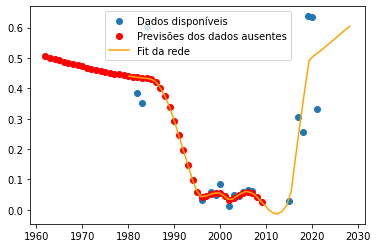

In [20]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

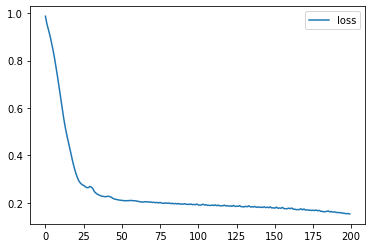

In [21]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [26]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_ind
df_prev_Camarao_ind = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Camarao misturado/Previsão Camarao_ind.xlsx')

for i in range(len(df_prev_Camarao_ind['Ano'])):
    if pd.isnull(df.loc[i,'Camarao_ind'])==True:
       df.loc[i,'Camarao_ind'] = df_prev_Camarao_ind.loc[i,'Camarao_ind']
df = df.replace(np.nan,0)

df_preenchido = df[['Ano','Cam_sete_barbas_ind']].replace(np.nan,0)

for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_sete_barbas_ind']=df_preenchido.loc[i,'Cam_sete_barbas_ind']+df.loc[i,'Camarao_ind']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_ind']*prev_continua[i]
      
df_preenchido = df_preenchido.loc[:2009-1950,:]

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)



#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Previsão Camarao_sete_barbas_ind_1962-2009.xlsx')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Ano  Cam_sete_barbas_ind  Valor acrescido
0   1950         0.000000e+00     0.000000e+00
1   1951         0.000000e+00     0.000000e+00
2   1952         2.493983e-13     2.493983e-13
3   1953         0.000000e+00     0.000000e+00
4   1954         0.000000e+00     0.000000e+00
5   1955         0.000000e+00     0.000000e+00
6   1956        -2.414332e-13    -2.414332e-13
7   1957         0.000000e+00     0.000000e+00
8   1958         2.375025e-13     2.375025e-13
9   1959        -2.355770e-13    -2.355770e-13
10  1960         0.000000e+00     0.000000e+00
11  1961         0.000000e+00     0.000000e+00
12  1962         2.808408e+00     2.808408e+00
13  1963         1.448583e+01     1.448583e+01
14  1964         3.123993e+01     3.123993e+01
15  1965         5.053874e+01     5.053874e+01
16  1966         6.750148e+01     6.750148e+01
17  1967         1.276358e+02     1.276358e+02
18  1968         2.549479e+02     2.549479e+02
19  1969         1.892

In [27]:
#Planilha com Camarao_ind decrescido do que ja foi usado de 1962 até 2009
Cam_ind_sem_sb_62_09 = df[['Ano','Camarao_ind']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_ind_sem_sb_62_09.loc[i,'Camarao_ind']-=Cam_ind_sem_sb_62_09.loc[i,'Camarao_ind']*prev_continua[i]

Cam_ind_sem_sb_62_09 = Cam_ind_sem_sb_62_09.iloc[:2010-1950,:]
with pd.option_context('display.max_rows', None,):
  print(Cam_ind_sem_sb_62_09)

Cam_ind_sem_sb_62_09.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_ind_sem_sb_62-09.xlsx')

     Ano   Camarao_ind
0   1950  0.000000e+00
1   1951  0.000000e+00
2   1952  2.053490e-13
3   1953  0.000000e+00
4   1954  0.000000e+00
5   1955  0.000000e+00
6   1956 -2.133141e-13
7   1957  0.000000e+00
8   1958  2.172448e-13
9   1959 -2.191704e-13
10  1960  0.000000e+00
11  1961  0.000000e+00
12  1962  2.751651e+00
13  1963  1.443910e+01
14  1964  3.167889e+01
15  1965  5.211824e+01
16  1966  7.080711e+01
17  1967  1.360954e+02
18  1968  2.760579e+02
19  1969  2.080767e+02
20  1970  3.661364e+02
21  1971  3.647837e+02
22  1972  5.186799e+02
23  1973  9.439537e+02
24  1974  2.624683e+02
25  1975  1.014475e+03
26  1976  4.524137e+02
27  1977  1.240302e+03
28  1978  1.296926e+02
29  1979  1.063468e+04
30  1980  2.722685e+02
31  1981  2.605881e+02
32  1982  1.245953e+02
33  1983  5.088601e+01
34  1984  5.386145e+01
35  1985  5.720713e+02
36  1986  5.839681e+01
37  1987  2.634329e+01
38  1988  3.445409e+01
39  1989  1.262760e+02
40  1990  0.000000e+00
41  1991  0.000000e+00
42  1992  0